# Arbre de decision

# Exercise 1

## Calcul de Gain d'Information et de l'Entropie

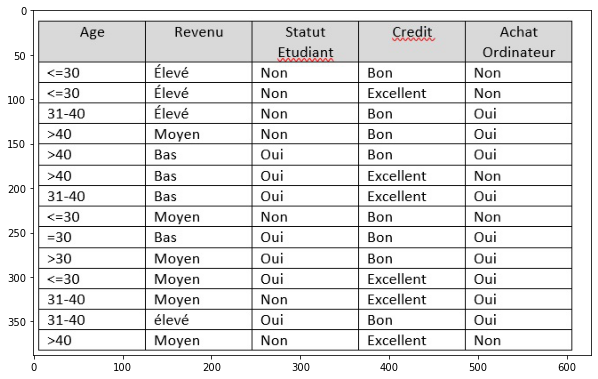

In [214]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('calcul_de_GI_Enytropie.jpg')
plt.figure(figsize = (10,7))
imgplot = plt.imshow(img)

In [196]:
import numpy as np
GI_Hini=0.939# GI initial
Tot_count=14
# GI - Gain d'Information

In [74]:
#Age
p1=np.array([2/5,5/5,2/4])
p2=np.array([3/5,0/5,2/4])
Hage=-(p1*np.log2(p1)+p2*np.log2(p2))

In [201]:
print(Hage)
E_Age=(5*Hage[0]+5*0+Hage[2]*4)/Tot_count
print('Entropie Age',E_Age)
GI_Age=GI_Hini-0.6325
print('GI Age',GI_Age)

Entropie Age 0.6324823551623816
GI Age 0.3065


In [198]:
#Revenu
p1=np.array([2/4,4/6,3/4])# There is 3 groups: eleve,moyen,bas. Il faut compter combien de OUI(Achat Ordinateur) pour chaque group
p2=np.array([2/4,2/6,1/4])# There is 3 groups: eleve,moyen,bas. Il faut compter combien de NON pour chaque group
Hrev=-(p1*np.log2(p1)+p2*np.log2(p2))
print(Hrev)
E_Rev=(4*Hrev[0]+6*Hrev[1]+4*Hrev[2])/Tot_count #Entropie - mesure de nonhomogenite de systeme
#We need to multiply Entropy for each group by the total number of counts of this group
print('Entropie Revenu',E_Rev)
GI_Rev=GI_Hini-0.911 # Gain d'information (difference between initial Entropy and the present Entropy)
print('GI Revenu',GI_Rev)

[1.         0.91829583 0.81127812]
Entropie Revenu 0.9110633930116763
GI Revenu 0.027999999999999914


In [199]:
#Status Etudiant
p1=np.array([6/7,3/7])
p2=np.array([1/7,4/7])
Het=-(p1*np.log2(p1)+p2*np.log2(p2))
print(Het)
E_et=(7*Het[0]+7*Het[1])/14
print('Entropie status etudiant',E_et)
GI_et=GI_Hini-E_et
print('GI Status Etudiant',GI_et)

[0.59167278 0.98522814]
Entropie status etudiant 0.7884504573082894
GI Status Etudiant 0.1505495426917105


In [200]:
#Credit
p1=np.array([6/8,3/6])
p2=np.array([2/8,3/6])
Het=-(p1*np.log2(p1)+p2*np.log2(p2))
print(Het)
E_cr=(8*Het[0]+6*Het[1])/14
print('Entropie credit', E_cr)
GI_cr=GI_Hini-E_cr
print('GI Credit',GI_cr)

[0.81127812 1.        ]
Entropie credit 0.8921589282623617
GI Credit 0.046841071737638296


## Il faut choisit Age, parce que GI_Age est plus eleve que GI_Credit, GI_Status_etudiant et GI_Revenu

# Exercise 2

## En utilisant jupyter notebook, procéder à la mise en place de votre classificateur pour le dataset «breast.data», en utilisant l’objet suivant :
classifier = DecisionTreeClassifier(criterion=”entropy”, random_state=44, max_depth=3, min_samples_leaf=5) 

Pour les données X suivantes ([4,2,1,1,1,2,3,2,1]), prédire la cible

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import random
import pandas as pd

## Load le data

In [90]:
df=pd.read_table("breast.data",sep=',',header =0) #Reading the data
print(df.head(10))#showing the first 10 lines

   id_number  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0    1000025                5                     1                      1   
1    1002945                5                     4                      4   
2    1015425                3                     1                      1   
3    1016277                6                     8                      8   
4    1017023                4                     1                      1   
5    1017122                8                    10                     10   
6    1018099                1                     1                      1   
7    1018561                2                     1                      2   
8    1033078                2                     1                      1   
9    1033078                4                     2                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1          

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


- On voit ici que Bare_Nuclei est pas bien formate. Il faux que ca soit de type int64.

### On regarde maintenant quelles sont des classes (y). 

In [189]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Il faut chercher les valueur manquante/incorrect dans Bare_Nuclei pour comprendre pourquoi le type n'est pas correct

In [147]:
display(df[df.isna().any(axis=1)].style.highlight_null('red'))

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


### On n'a pas trouve de NA , on cherche "?" et replace avec NaN

In [148]:
df['Bare_Nuclei'].replace("?", np.NaN, inplace=True)

In [149]:
display(df[df.isna().any(axis=1)].style.highlight_null('red'))

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,nan,7,3,1,4
40,1096800,6,6,6,9,6,nan,7,8,1,2
139,1183246,1,1,1,1,1,nan,2,1,1,2
145,1184840,1,1,3,1,2,nan,2,1,1,2
158,1193683,1,1,2,1,3,nan,1,1,1,2
164,1197510,5,1,1,1,2,nan,3,1,1,2
235,1241232,3,1,4,1,2,nan,3,1,1,2
249,169356,3,1,1,1,2,nan,3,1,1,2
275,432809,3,1,3,1,2,nan,2,1,1,2
292,563649,8,8,8,1,2,nan,6,10,1,4


### On fait la conversion de type de donnees 'Bare_Nuclei'

In [151]:
df['Bare_Nuclei']=df['Bare_Nuclei'].astype('float32')

### Maintenant on peut faire une imputation avec valuer moyenne

In [162]:
dfImputeMean=df.copy()
df1=dfImputeMean.fillna(dfImputeMean['Bare_Nuclei'].mean())

Nan_Rows_Ids=df1[df.isna().any(axis=1)].index
print(Nan_Rows_Ids)

Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')


In [215]:
display(df1.iloc[Nan_Rows_Ids,:])#ImputeMean
#display(df.iloc[Nan_Rows_Ids,:])#Original data

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,3.544656,7,3,1,4
40,1096800,6,6,6,9,6,3.544656,7,8,1,2
139,1183246,1,1,1,1,1,3.544656,2,1,1,2
145,1184840,1,1,3,1,2,3.544656,2,1,1,2
158,1193683,1,1,2,1,3,3.544656,1,1,1,2
164,1197510,5,1,1,1,2,3.544656,3,1,1,2
235,1241232,3,1,4,1,2,3.544656,3,1,1,2
249,169356,3,1,1,1,2,3.544656,3,1,1,2
275,432809,3,1,3,1,2,3.544656,2,1,1,2
292,563649,8,8,8,1,2,3.544656,6,10,1,4


## Repartition des donnees

### I have chosen 20% of data entries as test set, the rest: train. 

In [219]:
train,test=train_test_split(df1,test_size=0.2,stratify=df['Class'],random_state=10)
print('size of the train set (by class): \n',train.groupby('Class').size())
print('size of the test set (by class): \n',test.groupby('Class').size())

size of the train set (by class): 
 Class
2    366
4    193
dtype: int64
size of the test set (by class): 
 Class
2    92
4    48
dtype: int64


In [165]:
df1.columns

Index(['id_number', 'Clump_Thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

### On ne inclut pas 'id_number' dans notre modele

In [191]:
X_train=train[['Clump_Thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
y_train=train.Class
X_test=test[['Clump_Thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
y_test=test.Class
fn=['Clump_Thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']
cn=['2','4']

### Importing the library DecisionTree

In [167]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

## Train d'arbre de decision

In [220]:
dt=DecisionTreeClassifier(criterion='entropy', random_state=44, max_depth=3, min_samples_leaf=5)
dt.fit(X_train,y_train)
None

## Test d'arbre de decision

In [173]:
prediction=dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.957


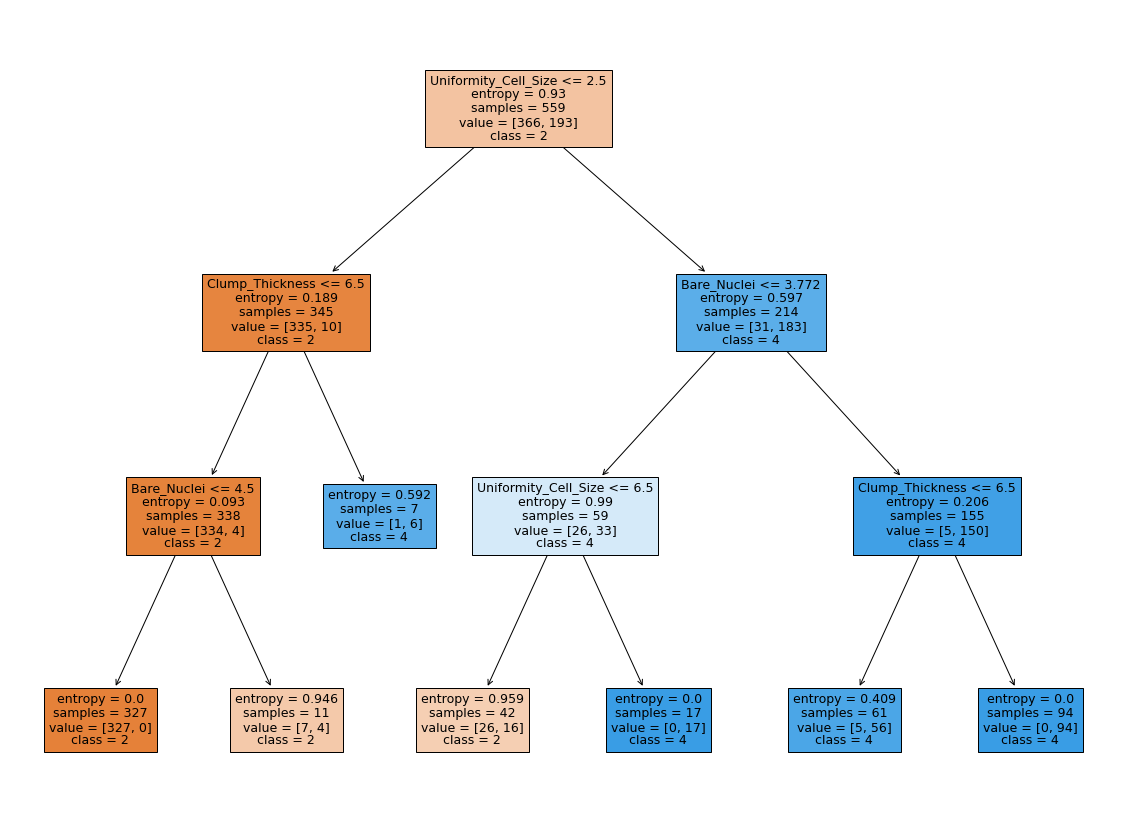

In [194]:
plt.figure(figsize=(20,15))
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
None

In [ ]:
### On doit predire la class pour ce les valeur de variables Xi:

In [190]:
X_test1=np.array([[4,2,1,1,1,2,3,2,1]])
prediction=dt.predict(X_test1)
print('Class = ',prediction)

Class =  [2]


### Pour les valuers de test X_test1 on peut predire que la class est '2'